In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np

2025-04-09 11:21:56.854431: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 11:21:57.064668: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 11:21:57.246946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744186917.409554   16687 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744186917.458676   16687 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744186917.861451   16687 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
train_dir = '/home/eugene/Downloads/AI Challenge Dataset/train'
test_dir = '/home/eugene/Downloads/AI Challenge Dataset/test'

IMG_SIZE = (128,128)
BATCH_SIZE = 32

In [3]:
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

Found 22566 files belonging to 80 classes.
Using 18053 files for training.


2025-04-09 11:22:04.775560: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
val = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

Found 22566 files belonging to 80 classes.
Using 4513 files for validation.


In [5]:
test = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

Found 6505 files belonging to 80 classes.


In [6]:
class_names = train.class_names
print(class_names)

['Bear', 'Brown bear', 'Bull', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths and butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar bear', 'Rabbit', 'Raccoon', 'Raven', 'Red panda', 'Rhinoceros', 'Scorpion', 'Sea lion', 'Sea turtle', 'Seahorse', 'Shark', 'Sheep', 'Shrimp', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squid', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Turtle', 'Whale', 'Woodpecker', 'Worm', 'Zebra']


2025-04-09 11:22:07.876187: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


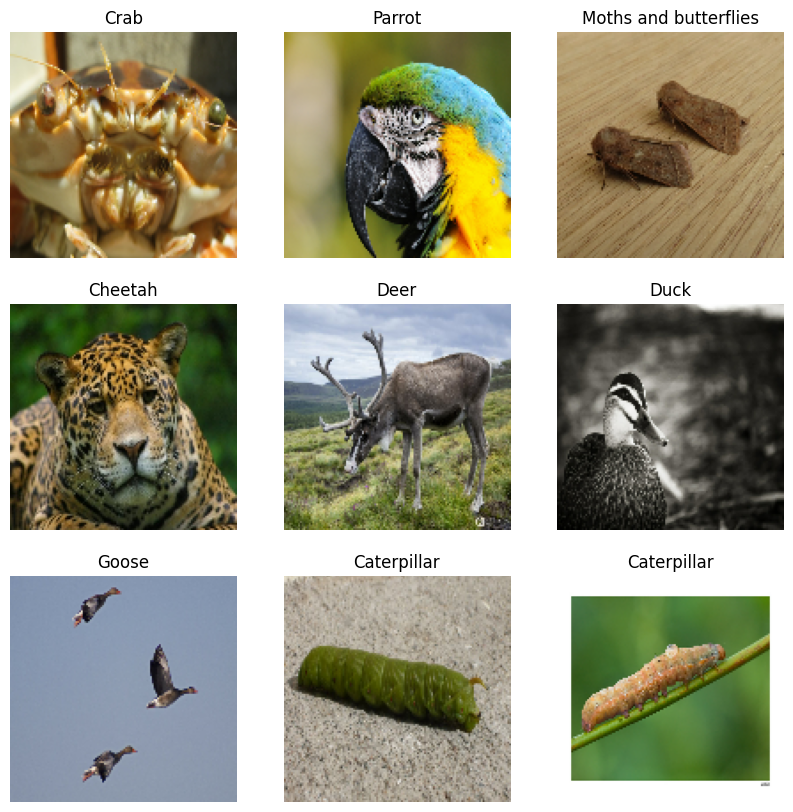

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 128, 3)
(32, 80)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  
])


/home/eugene/AI_Hackathon/Animal_Detector/venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

model_save_path = './models/animal_model.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

In [12]:
history = model.fit(
    train,
    validation_data=val,
    epochs=10
)

Epoch 1/10


2025-04-09 11:22:21.759370: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:28: Filling up shuffle buffer (this may take a while): 86 of 1000
2025-04-09 11:22:41.727111: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:28: Filling up shuffle buffer (this may take a while): 251 of 1000
2025-04-09 11:23:01.702895: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:28: Filling up shuffle buffer (this may take a while): 407 of 1000
2025-04-09 11:23:20.757239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


565/565 ━━━━━━━━━━━━━━━━━━━━ 427s 629ms/step - accuracy: 0.1114 - loss: 3.8915 - val_accuracy: 0.1471 - val_loss: 3.6121
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 352s 622ms/step - accuracy: 0.1724 - loss: 3.4709 - val_accuracy: 0.1919 - val_loss: 3.3635
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 342s 605ms/step - accuracy: 0.2306 - loss: 3.1500 - val_accuracy: 0.2185 - val_loss: 3.2205
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 347s 615ms/step - accuracy: 0.3040 - loss: 2.7415 - val_accuracy: 0.2282 - val_loss: 3.1732
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 325s 576ms/step - accuracy: 0.4070 - loss: 2.2604 - val_accuracy: 0.2289 - val_loss: 3.3446
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 325s 575ms/step - accuracy: 0.5364 - loss: 1.6952 - val_accuracy: 0.2289 - val_loss: 3.7629
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 325s 576ms/step - accuracy: 0.6726 - loss: 1.1521 - val_accuracy: 0.2039 - val_loss: 4.5603
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 391s 592ms/step - accuracy: 0.7850 - loss: 0.73

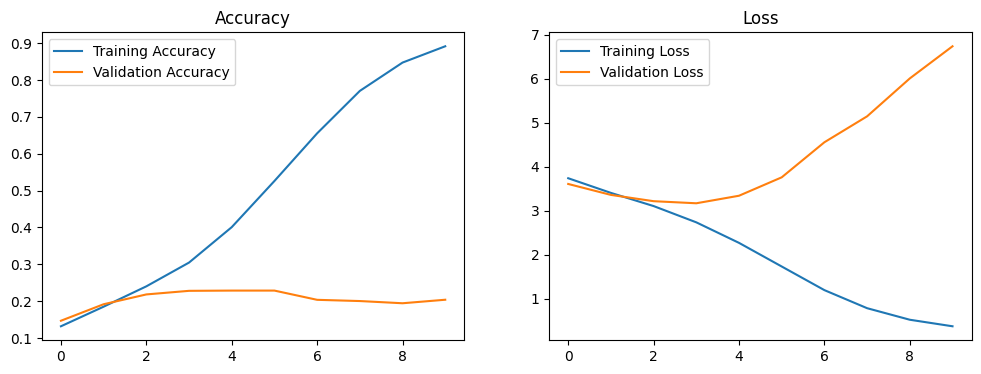

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [15]:
test_loss, test_accuracy = model.evaluate(test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


204/204 ━━━━━━━━━━━━━━━━━━━━ 69s 339ms/step - accuracy: 0.1573 - loss: 7.5651
Test Loss: 7.651521682739258
Test Accuracy: 0.15849345922470093


In [16]:
predictions = model.predict(test)

predicted_labels = np.argmax(predictions, axis=1)


204/204 ━━━━━━━━━━━━━━━━━━━━ 39s 192ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


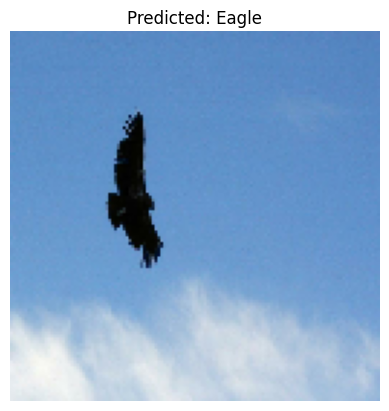

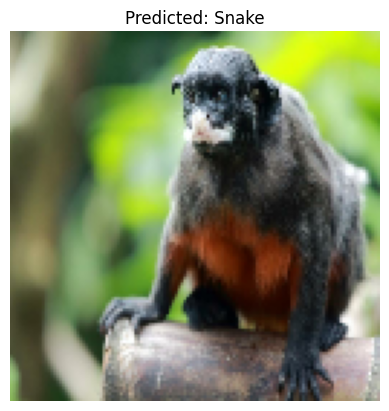

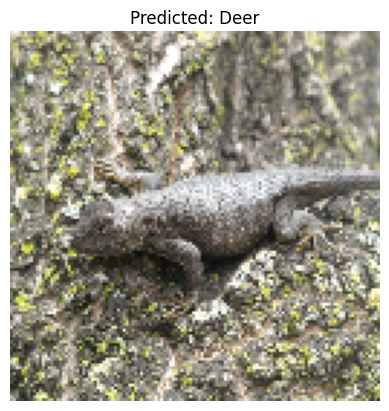

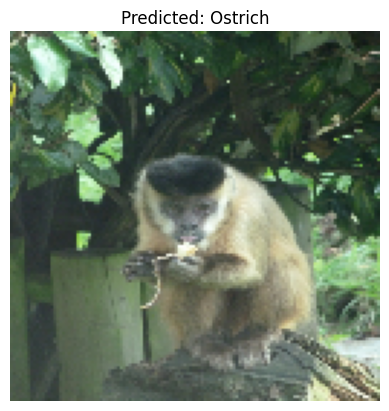

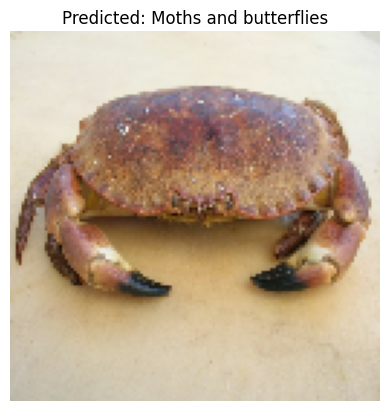

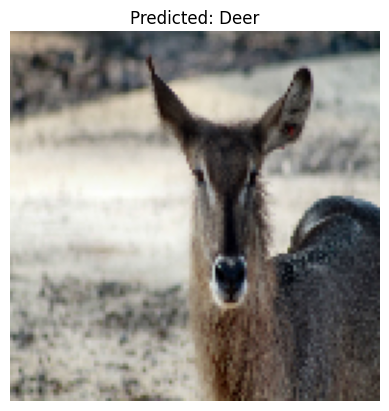

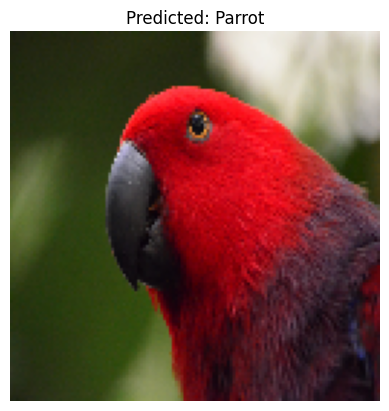

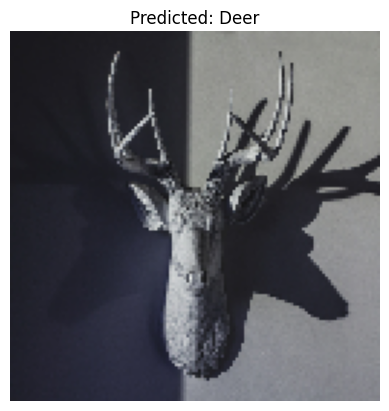

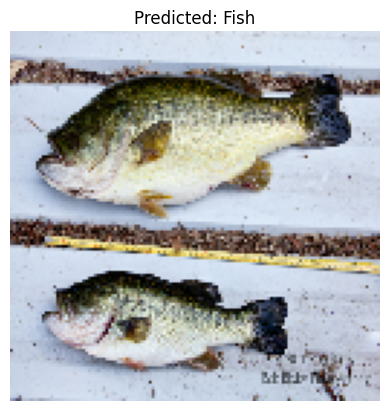

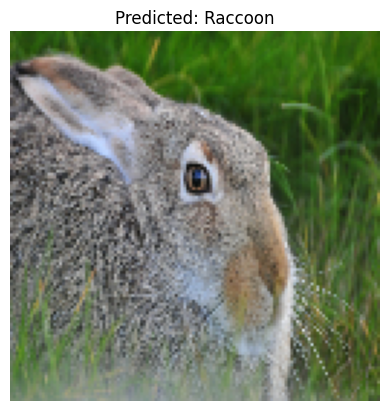

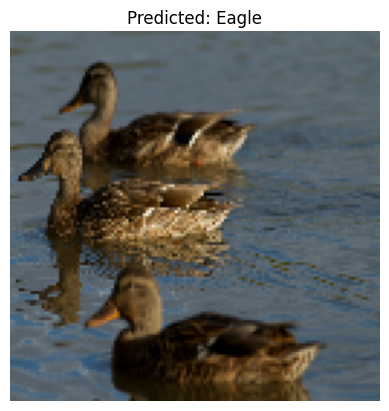

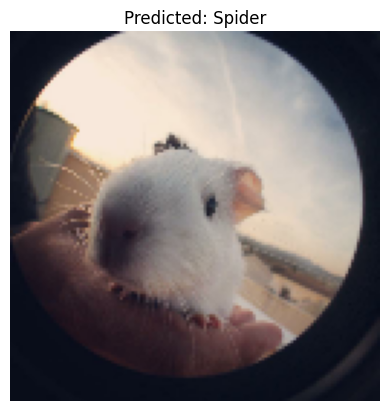

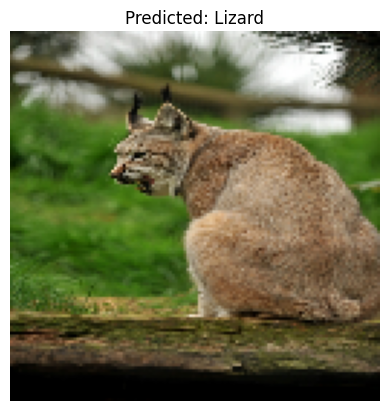

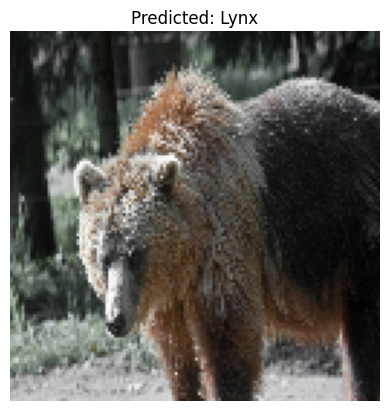

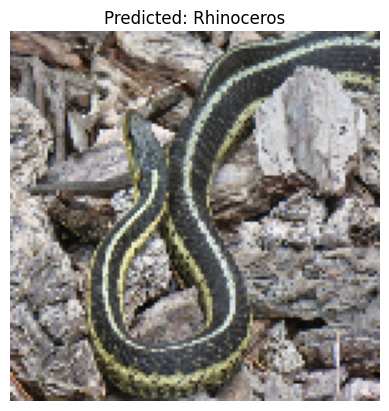

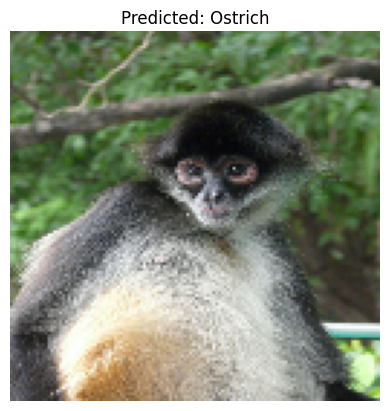

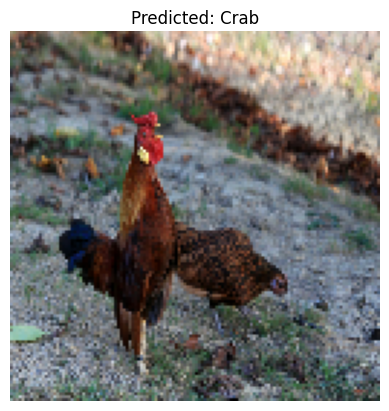

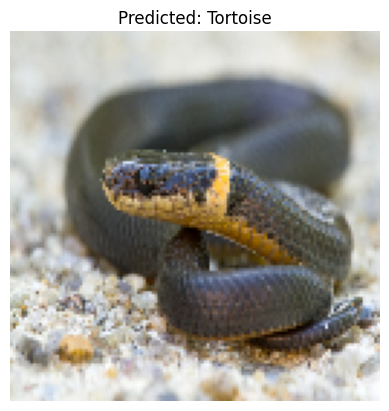

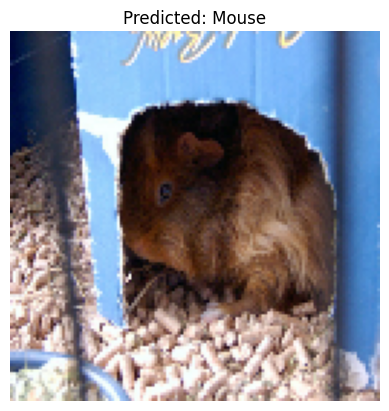

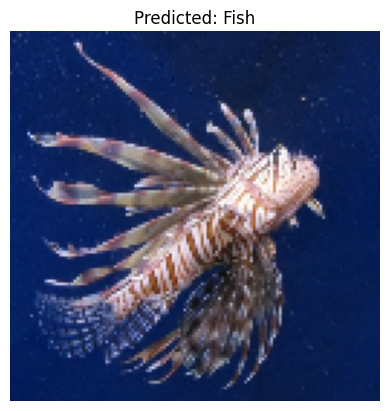

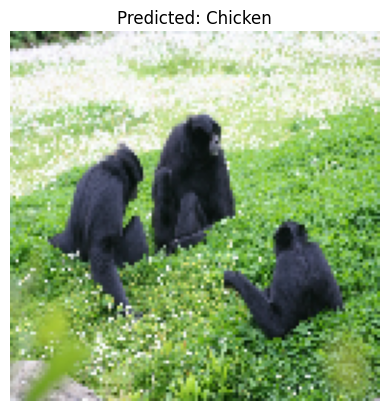

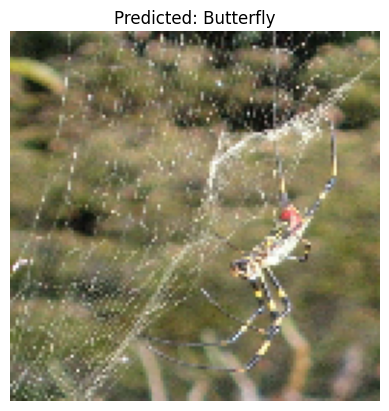

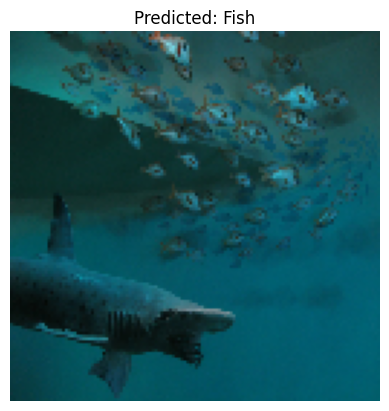

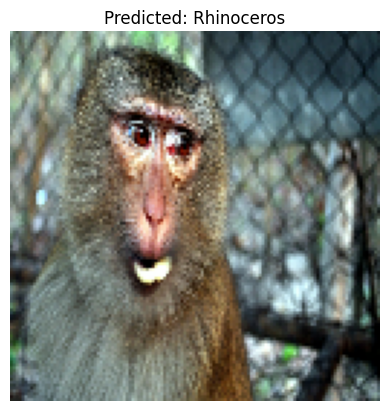

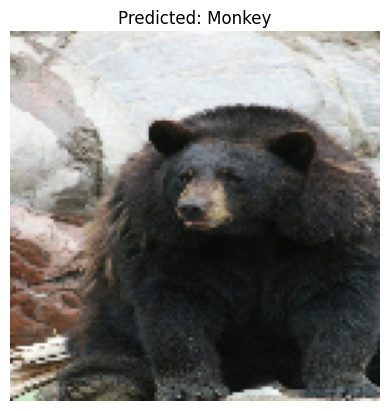

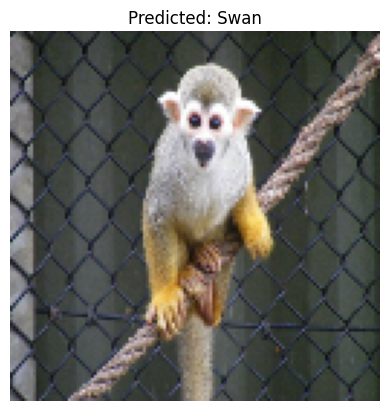

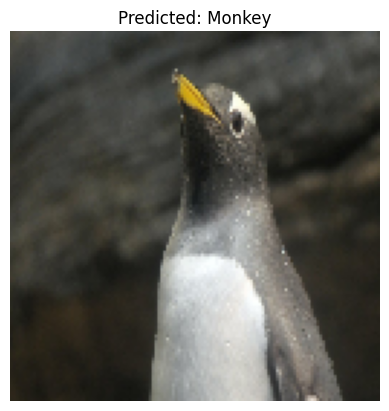

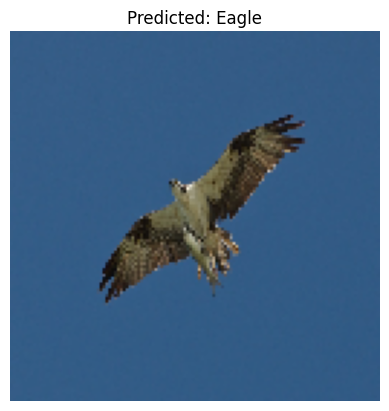

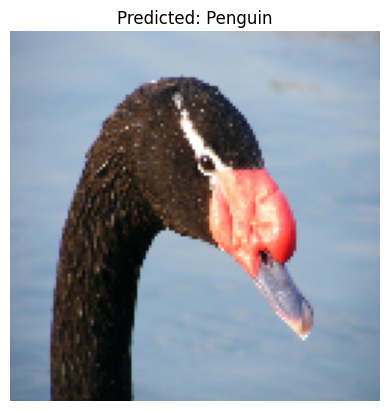

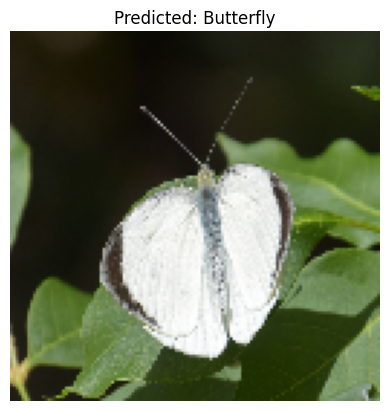

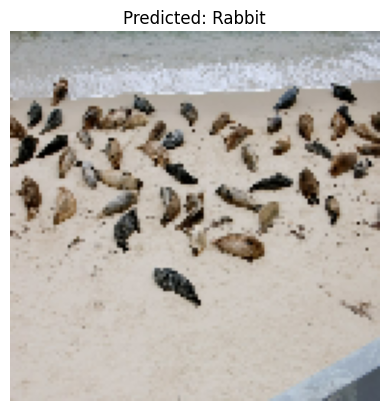

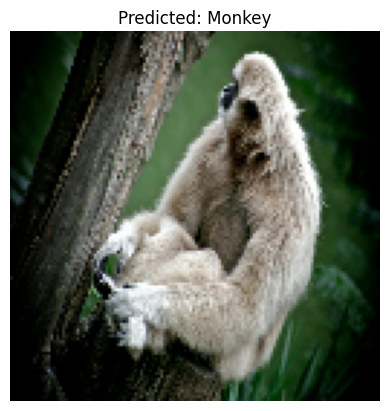

2025-04-09 12:51:46.909403: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
import matplotlib.pyplot as plt

for images, labels in test.take(1): 
    batch_predictions = model.predict(images)
    
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)
    
    for i in range(len(images)):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {class_names[batch_predicted_labels[i]]}")
        plt.axis('off') 
        plt.show()
